## Coded By Lucas Gomes 

# Q1: Describe and analyze the dataset --------------

The project's goal is to predict a font's name using images and machine learning / deep learning alogorithms; we are to pick two appropiate models and copare the accuracy obtained by both.

The dataset is divided into a training and test set.
it consists of 20x20 black and white images, each image is flattened to create 400 comlums and 196189 rows (total images number), each line contains a label (Y) which is the font's name and a corresponding flattened image, so we need to reshape the data so we can get the image in its normal shape and train our model accordingly.

My first choice is to work with the CNN model (The Convolutional Neural Network); it is a subtype of Neural Networks that is mainly used for applications in image and speech recognition. Its built-in convolutional layer reduces the high dimensionality of images without losing its information. That is why CNNs are especially suited for this use case.

the second model chosen is the DNN(Deep Neural Network).
DNNs are able to solve far more complex problems through a wide range of architectures other than simple feed-forward, fully connected networks.


## 1° importing needed libraries ---------------------------------------------------

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader, Dataset
import random
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



device= torch.device('cuda')

/kaggle/input/font-recognition/Font_Recognition/train.csv
/kaggle/input/font-recognition/Font_Recognition/test.csv


## 2°a) Importing the test dataset

In [31]:
test_font = pd.read_csv("../input/font-recognition/Font_Recognition/test.csv") # Adding the Test Data
test_font.info()                                                               # And getting some information of it
test_font.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48824 entries, 0 to 48823
Columns: 412 entries, font to r19c19
dtypes: float64(2), int64(408), object(2)
memory usage: 153.5+ MB


,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,CONSOLAS,CONSOLAS,7600,0.7,1,0.0,38,29,21,24,...,43,255,255,255,255,255,171,1,1,1
1,CENTURY,CENTURY SCHOOLBOOK,941,0.7,0,0.0,35,23,50,30,...,255,255,255,188,154,86,35,1,1,1
2,ARIAL,ARIAL BLACK,45,0.4,1,0.0,71,25,11,24,...,255,255,255,255,255,255,171,1,1,1
3,E13B,scanned,48,0.4,0,0.0,0,0,15,8,...,255,255,255,255,255,1,1,1,1,1
4,CREDITCARD,scanned,49,0.4,0,0.0,0,0,50,32,...,26,24,17,16,20,32,53,69,70,58


## 2°b) importing the train dataset

In [32]:
train_font = pd.read_csv("../input/font-recognition/Font_Recognition/train.csv") # Adding the Train data and getting some informations
train_font.info()
train_font.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196189 entries, 0 to 196188
Columns: 412 entries, font to r19c19
dtypes: float64(2), int64(408), object(2)
memory usage: 616.7+ MB


,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,FRANKLIN,FRANKLIN GOTHIC MEDIUM COND,197,0.7,1,0.0,24,20,60,44,...,1,47,255,255,255,232,1,1,1,1
1,GADUGI,GADUGI,5560,0.7,0,0.0,37,23,47,47,...,1,1,1,1,1,1,1,1,1,1
2,CREDITCARD,scanned,52,0.4,0,0.0,0,0,50,32,...,183,171,154,145,136,128,126,122,123,126
3,CALIBRI,CALIBRI,8216,0.4,0,0.0,38,25,17,10,...,1,1,1,1,1,1,1,1,1,1
4,BAUHAUS,BAUHAUS 93,8220,0.7,1,0.0,34,36,19,36,...,1,86,255,255,255,255,29,1,1,1


## 2°c) fitting them to our needs

In [33]:
X_test = test_font.iloc[:,12:] # Excludes all of the info inside the test data that are not pixels informations
X_train = train_font.iloc[:,12:] # Same process for the Train data
X_train.info()
X_train.head() # verifing if its all ok and working

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196189 entries, 0 to 196188
Columns: 400 entries, r0c0 to r19c19
dtypes: int64(400)
memory usage: 598.7 MB


,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,1,1,1,1,1,1,1,1,1,1,...,1,47,255,255,255,232,1,1,1,1
1,255,255,255,255,255,255,255,255,255,255,...,1,1,1,1,1,1,1,1,1,1
2,103,111,114,113,108,111,113,108,108,109,...,183,171,154,145,136,128,126,122,123,126
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,86,255,255,255,255,29,1,1,1


In [34]:
X_test.info()
X_test.head() # verifing if its all ok and working

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48824 entries, 0 to 48823
Columns: 400 entries, r0c0 to r19c19
dtypes: int64(400)
memory usage: 149.0 MB


,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,1,1,1,171,255,255,255,255,255,43,...,43,255,255,255,255,255,171,1,1,1
1,1,1,1,1,1,1,1,35,255,255,...,255,255,255,188,154,86,35,1,1,1
2,1,1,1,171,255,255,255,255,255,255,...,255,255,255,255,255,255,171,1,1,1
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,1,1,1,1,1
4,41,34,34,39,42,41,41,35,35,43,...,26,24,17,16,20,32,53,69,70,58


## 3° preparing and selecting the data features and labels

In [35]:
train_font.loc[:,'fontVariant'] #Showing all of the "fontVariants" variants

0         FRANKLIN GOTHIC MEDIUM COND
1                              GADUGI
2                             scanned
3                             CALIBRI
4                          BAUHAUS 93
                     ...             
196184                BODONI MT BLACK
196185                        scanned
196186                        scanned
196187                        scanned
196188               FRENCH SCRIPT MT
Name: fontVariant, Length: 196189, dtype: object

In [36]:
x=train_font[train_font.fontVariant=='scanned'] #Showing some of the results for the "scanned" fontVariants to compare
print(x)

              font fontVariant  m_label  strength  italic  orientation  m_top  \
2       CREDITCARD     scanned       52       0.4       0          0.0      0   
11      CREDITCARD     scanned       48       0.4       0          0.0      0   
16      CREDITCARD     scanned       48       0.4       0          0.0      0   
17            E13B     scanned       53       0.4       0          0.0      0   
18            E13B     scanned       55       0.4       0          0.0      0   
...            ...         ...      ...       ...     ...          ...    ...   
196180        E13B     scanned       52       0.4       0          0.0      0   
196182  CREDITCARD     scanned       52       0.4       0          0.0      0   
196185        E13B     scanned       57       0.4       0          0.0      0   
196186        E13B     scanned       49       0.4       0          0.0      0   
196187        E13B     scanned       50       0.4       0          0.0      0   

        m_left  originalH  

In [37]:
showing_train = train_font.iloc[:,:12] # Checking the information inside the train data first 12 columns
showing_train

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,h,w
0,FRANKLIN,FRANKLIN GOTHIC MEDIUM COND,197,0.7,1,0.0,24,20,60,44,20,20
1,GADUGI,GADUGI,5560,0.7,0,0.0,37,23,47,47,20,20
2,CREDITCARD,scanned,52,0.4,0,0.0,0,0,50,32,20,20
3,CALIBRI,CALIBRI,8216,0.4,0,0.0,38,25,17,10,20,20
4,BAUHAUS,BAUHAUS 93,8220,0.7,1,0.0,34,36,19,36,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...
196184,BODONI,BODONI MT BLACK,245,0.4,1,0.0,38,21,44,39,20,20
196185,E13B,scanned,57,0.4,0,0.0,0,0,15,8,20,20
196186,E13B,scanned,49,0.4,0,0.0,0,0,16,8,20,20
196187,E13B,scanned,50,0.4,0,0.0,0,0,15,8,20,20


## Y for train and Y for test

Defining the name of the variables that the code will be processing to find out and learn how to determine them.


In [38]:
Ytr = train_font['fontVariant']
Yte = test_font['fontVariant']

Y = pd.concat([Ytr,Yte])
Y = Y.apply(lambda x: 0 if x != 'scanned' else 1).to_numpy() # scanned = 1, not scanned = 0

Y_train = Y[:X_train.shape[0]]
Y_test = Y[X_train.shape[0]:]

print(Y_train.size)
print(Y_train)

196189
[0 0 1 ... 1 1 0]


# Q2: Detail the distribution of the dataset labels

<AxesSubplot:title={'center':'Training labels distribution'}>

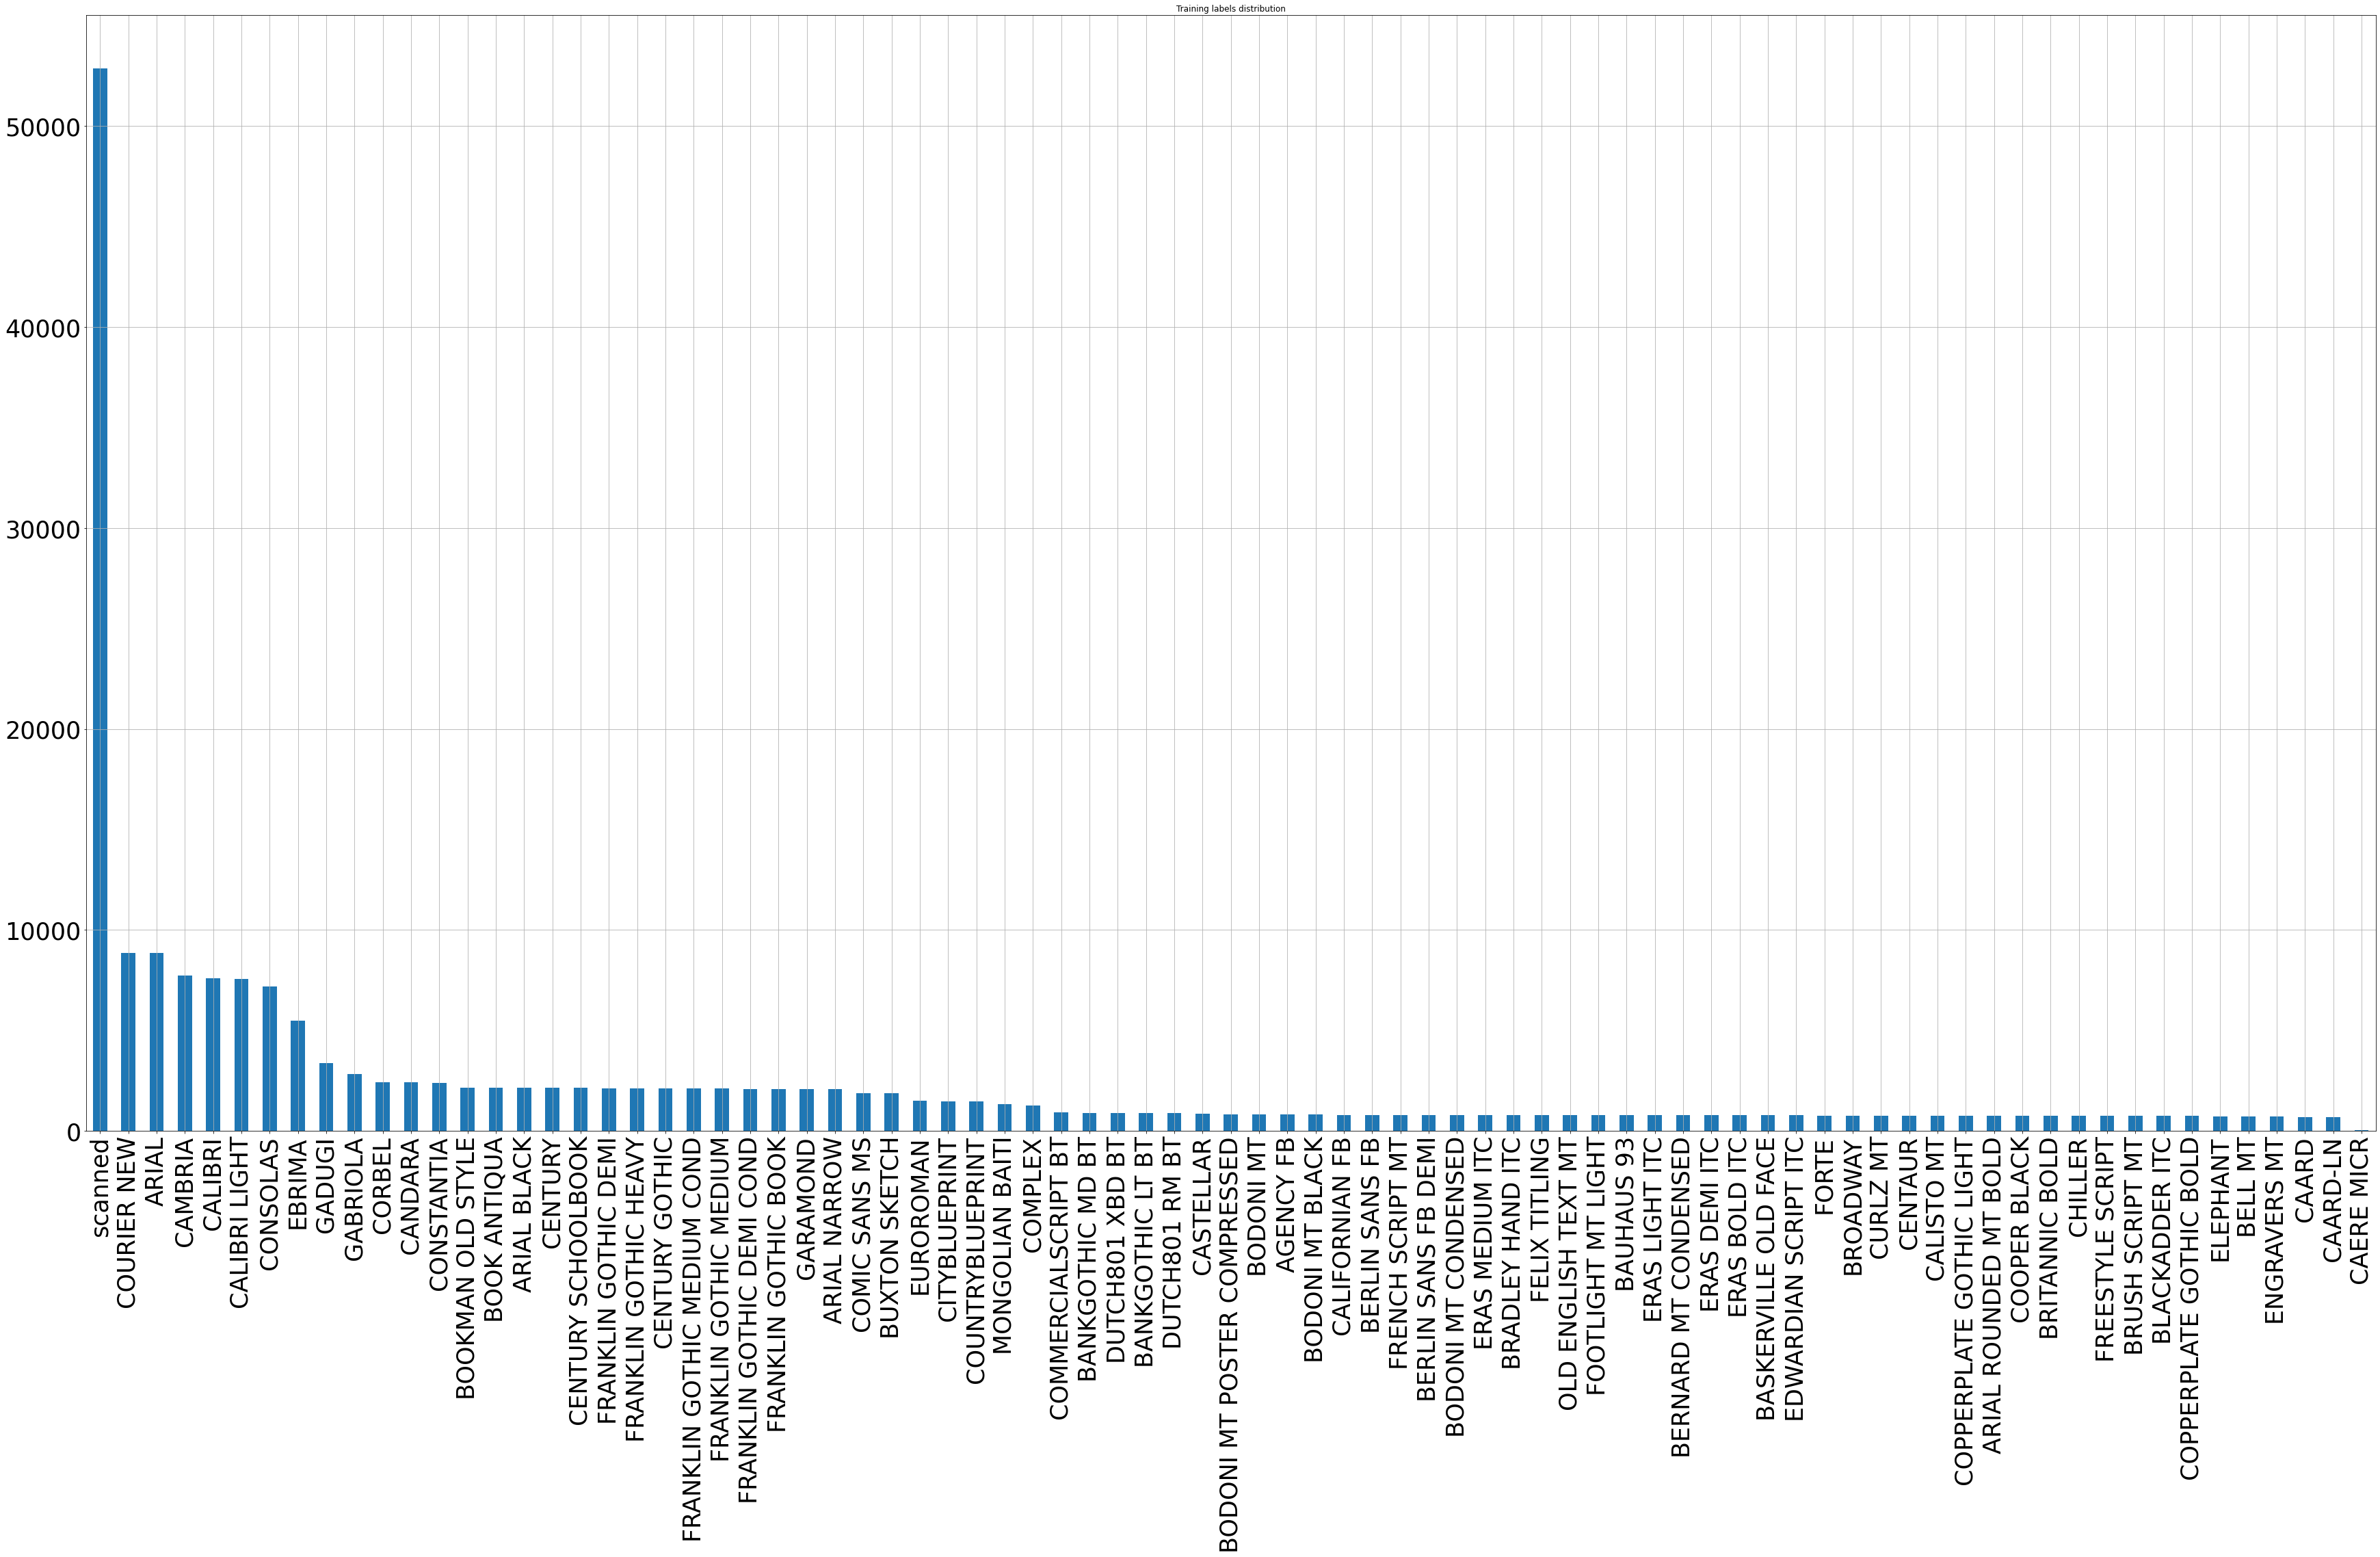

In [39]:
Ytr.value_counts().plot(kind='bar',figsize=(60,30),title="Training labels distribution",fontsize=35,grid=True)

# Displacing the fonts in a bar graph

# Question 3 - Describe and propose two different ML models to predict if a font was scanned or not. Create a model to solve this task

## 4° Creating the class DatasetFONT 

This class inherits from the pre-coded Dataset class from torch, this way it's easier for us to manage, arrange, call or reshape the whole data, a split-type parameter is included to let the user choose which part he needs.

In [40]:
class DatasetFONT(Dataset):
    
    def __init__(self, split):
        if split == 'train':
            tmp = X_train
            self.X = tmp.to_numpy().reshape([-1, 1, 20, 20])
            self.Y = Y_train
        elif split == 'test':
            tmp = X_test
            self.X = tmp.to_numpy().reshape([-1, 1, 20, 20])
            self.Y = Y_test
        else:
            print("second parameter is wrong, choose train for TrainSet, test for TestSet")
        self.X = torch.from_numpy(self.X).to(device)
        self.Y = torch.from_numpy(self.Y).to(device)
        
    def __len__(self):
        return self.X.size()[0]
    
    def __getitem__(self, index):
        image =  self.X[index]
        label = self.Y[index]      
           
        return image, label

##  4°b) function to test the accuracy


In [41]:
def test_accuracy(model): 
    test_acc=0
    for batch_test, (x_test, y_test) in enumerate(test_loader): #making the loop of batches for the function test loader
        _, y_pred_test = model(x_test.float())
        test_acc += accuracy_score(y_test.cpu().numpy(), np.argmax(y_pred_test.cpu().detach().numpy(), axis=1)) # The biggest probability
    return test_acc/batch_test #Avarege accuracy of the test for each batch 

##  4°c) function to save the model


In [42]:
def save_model(model, optimizer, name): 
    checkpoint = {'model': model.to('cpu'),
      'state_dict': model.state_dict(),
      'optimizer' : optimizer.state_dict()}
    torch.save(checkpoint,name+".pth")
    print('Model was saved')
    model.to(device)

##  4°d) Function to load the saved model

In [43]:
def load_model(model, name):
    path = "../working/"+name+".pth"
    if os.path.isfile(path)==True:
        checkpoint = torch.load(path)
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        print('Existing Model loaded')
    else:
        print('No existing Model yet')

##  4°e) Function to make the process in a looping, making it learn


In [44]:
def train_loop(model,name, epochs):
    loss_fn = nn.CrossEntropyLoss() # Loss function by using multiclass classification
    global optimizer, accuracyMax
    accuracyMax = 0
    optimizer = torch.optim.Adam(model.parameters(), lr=0.00005) # We did using Adam optimazation,wildely used
    for epoch in range(1, epochs+1):
        loss = 0
        for batch, (x_train, y_train) in enumerate(train_loader): 
            y_pred_train, _ = model(x_train.float()) # Forward class
            loss_train = loss_fn(y_pred_train, y_train) # Backward class
            loss += loss_train.item()
            optimizer.zero_grad() # Zero Gradiants
            loss_train.backward() # Gradients by learning rate
            optimizer.step() # Updating
        accuracy = test_accuracy(model)
        print("Epoch # %d, train_loss: %s , test accuracy: %s" %(epoch, loss/batch, accuracy))
        if accuracy > accuracyMax:
            accuracyMax = accuracy
            save_model(model, optimizer, name)

##  4°f) Function to train based on the data loaded


In [45]:
def train_load(bs):
    global train_dataset, test_dataset, batch_size, train_loader, test_loader
    train_dataset = DatasetFONT('train')
    test_dataset = DatasetFONT('test')
    img, lab = train_dataset.__getitem__(0)
    print(img.size())
    print(type(img))
    batch_size = bs
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # Torch Class Dataloader
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # not shuffling test dataset
    train_iter = iter(train_loader) # Testing the trainloader 
    images, labels = train_iter.next() 
    print('images shaped on batch size = ', images.size()) 
    print('labels shaped on batch size = ', labels.size())
    grid = torchvision.utils.make_grid(images.cpu())  
    plt.imshow(grid.numpy().transpose((1, 2, 0))) # [1,20, 20] to [20, 20, 1] (open cv format)
    plt.axis('off')
    plt.title(labels.cpu().numpy()); # Titles of the numbers

## 5) Defining the CNN model and its layers

This class defines the architecture of the model, its depth, its width and  its activation functions of each layer for the forward pass, this returns the result of our model's prediction.

In [46]:
class CNNModel(nn.Module):
    def __init__(self): #__init__is constructor in Python
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding='same') 
        # The number of kernels input
        # The number of kernels output
        # Padding "same" = same size of the input layer and feature map
        # Padding "valid" = reduced size of the map, (20 to 18)
        self.conv2 = nn.Conv2d(32, batch_size, kernel_size=3, padding='same') 
        # First value is the number of kernels input, (in here is the same as the output of the 1st conv)
        self.fc1 = nn.Linear(5*5*batch_size, 256)    #First Parameter = number of input features 

        self.fc2 = nn.Linear(256, max(Y_train)+1)    # Second parameter = number of output features  
                                                     # In this case 2: 0 (not scanned) or 1(scanned)

    def forward(self, x): 
        #pooling reduces the input size. 
        #relu applies the function to rectifie linear units
        x = F.relu(F.max_pool2d(self.conv1(x), 2)) 
        # batchsize=32, number of channels=8, 3° and 4° dimensions of x are 10 (down 50%)
        x = F.relu(F.max_pool2d(self.conv2(x),2))
        #batchsize = 32, number of channels=8, t3° and 4° dimensions of x are 5 (down more 50%)
        x = x.view(-1,5*5*batch_size ) # Dimensions reduced to 1 because of flattening (easier to use layer after convolution)
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        x_soft = F.softmax(x, dim=1) # softmax to calculate the accuracy
        return x, x_soft

### Calling our defined functions

torch.Size([1, 20, 20])
<class 'torch.Tensor'>
images shaped on batch size =  torch.Size([64, 1, 20, 20])
labels shaped on batch size =  torch.Size([64])


/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


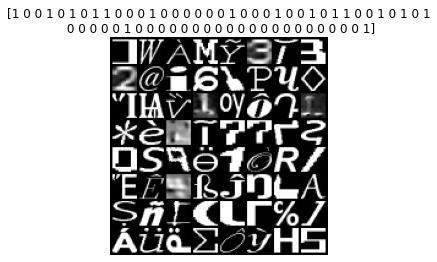

In [47]:
train_load(64)

## 5°b) Testing the learning process using the CNN Model

In [48]:
cnnmodel = CNNModel().to(device) # Creates a CNN model and publishes to the GPU  

train_loop(cnnmodel,'CNN_Scan', 7) # Start running the training

Epoch # 1, train_loss: 0.13598158503404012 , test accuracy: 0.9683340363704537
Model was saved
Epoch # 2, train_loss: 0.06179786212890459 , test accuracy: 0.9848231861642295
Model was saved
Epoch # 3, train_loss: 0.04197285083604165 , test accuracy: 0.9863376452943381
Model was saved
Epoch # 4, train_loss: 0.03064749062005856 , test accuracy: 0.9897825271841019
Model was saved
Epoch # 5, train_loss: 0.023806506207465956 , test accuracy: 0.990626171728534
Model was saved
Epoch # 6, train_loss: 0.01924652588133739 , test accuracy: 0.9886137279715035
Epoch # 7, train_loss: 0.01578475306737383 , test accuracy: 0.9934969066366705
Model was saved


In [49]:
print(Y_test)

[0 0 0 ... 1 0 0]


## Continuing the method using the load function

In [50]:
load_model(cnnmodel, 'CNN_Scan')
train_loop(cnnmodel,'CNN_Scan', 3) # Re-starts the program

Existing Model loaded
Epoch # 1, train_loss: 0.013301802883867583 , test accuracy: 0.9931278121484814
Model was saved
Epoch # 2, train_loss: 0.010635153603004061 , test accuracy: 0.9937429696287965
Model was saved
Epoch # 3, train_loss: 0.00928246112885456 , test accuracy: 0.9943346925384327
Model was saved


## 6° Defining the DNN model and its layers

This class defines the architecture of the model, its depth, its width and  its activation functions of each layer for the forward pass, this returns the result of our model's prediction.

In [51]:
class DNNModel(nn.Module):
    def __init__(self,input_dim):
        super(DNNModel, self).__init__()
        self.layer0 = nn.Flatten()
        self.layer1 = nn.Linear(input_dim,512)
        self.layer2 = nn.Linear(512,1024)  
        self.layer3 = nn.Linear(1024,2048)
        self.layer4 = nn.Linear(2048,1024)
        self.layer5 = nn.Linear(1024,512)
        self.layer6 = nn.Linear(512,256)
        self.layer7 = nn.Linear(256,max(Y_train)+1)
        
        
    def forward(self,x):
        x = (self.layer0(x))
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x)) 
        x = F.relu(self.layer4(x)) 
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))
        x = self.layer7(x)
        x_soft = F.softmax(x, dim=1)
        
        return x, x_soft

## Calling the functions

In [52]:
dnnmodel = DNNModel(X_train.shape[1]).to(device) # Setting up the DNN Model
    
train_loop(dnnmodel,'DNN_Scan', 6) # Starts the DNN training loop

Epoch # 1, train_loss: 0.10677141074309973 , test accuracy: 0.98024758623922
Model was saved
Epoch # 2, train_loss: 0.057435729503927856 , test accuracy: 0.9831007452193476
Model was saved


## Keep running the code

In [53]:
load_model(dnnmodel, 'DNN_Scan')
train_loop(dnnmodel,'DNN_Scan', 5) 

Existing Model loaded
Epoch # 1, train_loss: 0.0429208914239034 , test accuracy: 0.9842021700412448
Model was saved
Epoch # 2, train_loss: 0.033930601327867876 , test accuracy: 0.9851512701537308
Model was saved
Epoch # 3, train_loss: 0.028431700842960574 , test accuracy: 0.9874009889388826
Model was saved
Epoch # 4, train_loss: 0.02441406070948891 , test accuracy: 0.9879809945631797
Model was saved
Epoch # 5, train_loss: 0.02206851082792869 , test accuracy: 0.9843076256092987


# Q4: Explain the limitations of each of the models.

## a) CNN
A convolutional neural network, CNN, is adding additional “filtering” layers where the filter weights or convolution kernels can be learned in addition to the weights and biases for each neuron.
However this method have some limitants, like not being able to encode the position and orientation of object, lack of ability to be spatially invariant to the input data and it requeires a lot of training data.

## b) DNN
DNNs can only address part of what actually cognitive systems need and which challenges they face. The focus on supervised benchmarking shifts research on the multiple, interconnected facets of cognitive robots to a rather engineered approach accompanied by constraints on the data and the environment. Critical investigations on DNNs also reveal that due to their high dependence on apriori knowledge, they are easily fooled and fail to cope with, e.g., real-world speech data from children

# Q5: Detecting the Font 

### This step was really simple, the only thing necessary was to change the Y to the font, this way the CNN and DNN will be trying to figure out the fonts and not the font variant.

## 7° Changing the Y for our new paramether to be defined: the font

In [56]:
Ytr = train_font['font']
Yte = test_font['font']

Y = pd.concat([Ytr,Yte])
Y = Y.factorize()[0]

Y_train = Y[:X_train.shape[0]]
Y_test = Y[X_train.shape[0]:]

print(Y_train.size)
print(Y_train)

196189
[ 0  1  2 ... 10 10 53]


torch.Size([1, 20, 20])
<class 'torch.Tensor'>
images shaped on batch size =  torch.Size([64, 1, 20, 20])
labels shaped on batch size =  torch.Size([64])


/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


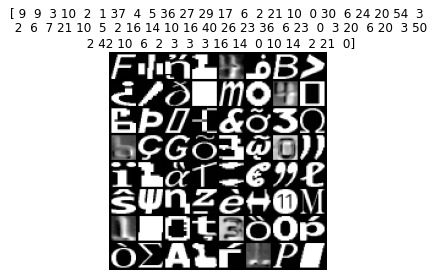

In [57]:
train_load(64)

## Trying with the CNN

In [58]:
cnnmodel2 = CNNModel().to(device) # Calls the CNN Model with the new paramethers
   
train_loop(cnnmodel2,'CNN_Font', 20)

Epoch # 1, train_loss: 2.6304826307452327 , test accuracy: 0.4231463254593176
Model was saved
Epoch # 2, train_loss: 2.01796659758196 , test accuracy: 0.4885756467941507
Model was saved


## Trying with the DNN

In [59]:
dnnmodel2 = DNNModel(X_train.shape[1]).to(device) # Calls the DNN Model with the new paramethers
   
train_loop(dnnmodel2,'DNN_Font', 20) 

Epoch # 1, train_loss: 2.246629491793584 , test accuracy: 0.4864928993250843
Model was saved
Epoch # 2, train_loss: 1.6531446298222752 , test accuracy: 0.5489138076490439
Model was saved
